In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from helper import hist, sp_noise
img = cv2.imread('img_in/basic_image.jpg', 0)

noised = []
probabilities = [0.01,0.02,0.05,0.1,0.2,0.5]

for prob in probabilities:
    img_noised = sp_noise(img, prob)
    noised.append(img_noised)
    img_noised.save(f'img_out/basic_image_noise_{prob*100}.jpg')



# def dilatation(img, ker):
#     length, width = img.shape[0], img.shape[1] 
#     temp = (len(ker)- 1)//2
#     arr = np.zeros((length + 2*temp , width + 2*temp))
#     arr[temp :length + temp, temp :width + temp]= img.copy()
#     copy = img.copy()
    
#     for i in range(temp, length + temp):
#         for j in range(temp, width + temp):
#             copy[i-temp, j-temp] = np.sum(arr[i-temp: i+temp+1, j-temp: j+temp+1], where=ker)
#             if copy[i-temp, j-temp] > 1:
#                 copy[i-temp, j-temp ] = 255
#             else:
#                 copy[i-temp, j-temp ] = 0
#     return copy


# ker = np.array([[True for i in range(3)] for j in range(3)])

# dilate = dilatation(img, ker)
# print(np.unique(dilate))
# cv2.imwrite('dilation_square.png', dilate)
# plt.imshow(dilate)

# ker = np.array([[False, True, False],[True, True, True],[False, True, False]])

# dilate = dilatation(img, ker)
# cv2.imwrite('dilation_square.png', dilate)
# plt.imshow(dilate)


# def op(img, ker):
#     arr = erosion(img, ker)
#     arr = dilatation(arr, ker)
#     return arr

# def cl(img, ker):
#     arr = dilatation(img, ker)
#     arr = erosion(arr, ker)
#     return arr

# def filter(image):
#     res = image.copy()
#     for i in range(1, image.shape[0] - 1):
#         for j in range(1, image.shape[1] - 1):
#             if image[i, j] == 0:
#                 if image[i, j + 1] == 255 and image[i, j - 1] == 255 and image[i + 1, j] == 255 and image[i - 1, j] == 255:
#                     res[i, j] = 255
#             elif image[i, j] == 255:
#                 if image[i, j + 1] == 0 and image[i, j - 1] == 0 and image[i + 1, j] == 0 and image[i - 1, j] == 0:
#                     res[i, j] = 0
#     return res

# opens_square, opens_cross, closes_square, closes_cross = [], [], [], []

# def CROSS(i):
#     if i == 3:
#         return np.array([[False, True, False],[True, True, True],[False, True, False]])
#     else:
#         return np.array([[False, False, True, False, False],[False,False,True,False,False],
#                          [True, True,True, True, True],[False, False, True, False, False],
#                          [False, False, True, False, False]])
    
# for key, noise in enumerate(noised):
#     for i in range(3, 6, 2):
#         opening = op(noise, np.ones((i,i),np.bool))
#         cv2.imwrite('open_and_close/open_square'+ str(key) + '_' + str(int(i)) + '.png', opening)
#         opens_square.append(opening)
        
#         closing = cl(noise, np.ones((i,i),np.bool))
#         cv2.imwrite('open_and_close/close_square' +str(key) + '_'+ str(int(i)) + '.png', closing)
#         closes_square.append(closing)
        
#         opening = op(noise, CROSS(i))
#         cv2.imwrite('open_and_close/open_cross' + str(key) + '_' + str(int(i)) + '.png', opening)   
#         opens_cross.append(opening)
        
#         closing = cl(noise, CROSS(i))
#         cv2.imwrite('open_and_close/close_cross' + str(key) + '_' + str(int(i)) + '.png', closing)
#         closes_cross.append(closing)

#         filt = filter(noise)
#         cv2.imwrite('open_and_close/filter' +  str(key) + '.png', filt)

# def coef(image, filter_image, noised_image):
#     all_noises = 0
#     after_filter = 0
#     for i in range(image.shape[0]):
#         for j in range(image.shape[1]):
#             if image[i, j] != noised_image[i, j]:
#                 all_noises += 1
#             if image[i, j] != filter_image[i, j]:
#                 after_filter += 1
#     return after_filter/all_noises

# print('coef')

# def coeff(img, arr, s):
#     for i in range(2):
#         if i == 1:
#             print(s, 5)
#         else:
#             print(s, 3)
#         print("шум 1%:", coef(img, arr[i], noised[0]))
#         print("шум 2%:", coef(img, arr[2 + i], noised[1]))
#         print("шум 5%:", coef(img, arr[4 + i], noised[2]))
#         print("шум 10%:", coef(img, arr[6 + i], noised[3]))
#         print("шум 20%:", coef(img, arr[8 + i], noised[4]))
#         print("шум 50%:", coef(img, arr[10 + i], noised[5]))
    
# coeff(img, opens_square, 'Открытие: квадрат размером')
# print(' ')
# coeff(img, closes_square, 'Закрытие: квадрат размером')
# print(' ')
# coeff(img, opens_cross, 'Открытие: крест размером')
# print(' ')
# coeff(img, closes_cross, 'Закрытие: крест размером')


# def contours(image, erod_image):
#     res = image.copy()
#     for i in range(res.shape[0]):
#         for j in range(res.shape[1]):
#             res[i, j] = image[i, j] ^ erod_image[i, j]
#     return res

# erod_image = cv2.erode(img,cv2.getStructuringElement(cv2.MORPH_CROSS,(3, 3)))
# res = contours(img, erod_image)
# cv2.imwrite('erosion_contours_cross.png', res)
# plt.imshow(res)

# dilate_image = cv2.dilate(img,cv2.getStructuringElement(cv2.MORPH_CROSS,(3, 3)))
# res = contours(img, dilate_image)
# cv2.imwrite('dilate_contours_cross.png', res)
# plt.imshow(res)


# dilate_image = cv2.dilate(img,np.ones((5,5),np.uint8))
# res = contours(img, dilate_image)
# cv2.imwrite('dilate_contours_square.png', res)
# plt.imshow(res)


# erosion_image = cv2.erode(img,np.ones((5,5),np.uint8))
# res = contours(img, erosion_image)
# cv2.imwrite('erosion_contours_square.png', res)
# plt.imshow(res)

# def horizont(image, size):
#     mask = np.zeros((size, size))
#     center = size // 2
#     for i in range(size):
#         mask[i, center] = 1
        
#     mask = np.array(mask, np.uint8)
#     erod_image = cv2.erode(image, mask)  
#     res = contours(image, erod_image)
#     return res

# def vertical(image, size):
#     mask = np.zeros((size, size))
#     center = size // 2
#     for i in range(size):
#         mask[center, i] = 1
    
#     mask = np.array(mask, np.uint8)
#     erod_image = cv2.erode(image, mask)  
#     res = contours(image, erod_image)
#     return res

In [31]:
def idx_check(index):
    if index < 0:
        return 0
    else:
        return index

def dilation(binary_img_matrix = None, structuring_element = np.ones((3, 3))):
    binary_img_matrix = np.asarray(binary_img_matrix)
    structuring_element = np.asarray(structuring_element)
    ste_shp = structuring_element.shape
    dilated_img = np.zeros((binary_img_matrix.shape[0], binary_img_matrix.shape[1]))
    ste_origin = ((structuring_element.shape[0]-1)/2, (structuring_element.shape[1]-1)/2)
    for i in range(len(binary_img_matrix)):
        for j in range(len(binary_img_matrix[0])):
            overlap = binary_img_matrix[idx_check(i - ste_origin[0]):i + (ste_shp[0] - ste_origin[0]), idx_check(j - ste_origin[1]):j + (ste_shp[1] - ste_origin[1])]
            shp = overlap.shape

            ste_first_row_idx = int(np.fabs(i - ste_origin[0])) if i - ste_origin[0] < 0 else 0
            ste_first_col_idx = int(np.fabs(j - ste_origin[1])) if j - ste_origin[1] < 0 else 0

            ste_last_row_idx = ste_shp[0] - 1 - (i + (ste_shp[0] - ste_origin[0]) - binary_img_matrix.shape[0]) if i + (ste_shp[0] - ste_origin[0]) > binary_img_matrix.shape[0] else ste_shp[0]-1
            ste_last_col_idx = ste_shp[1] - 1 - (j + (ste_shp[1] - ste_origin[1]) - binary_img_matrix.shape[1]) if j + (ste_shp[1] - ste_origin[1]) > binary_img_matrix.shape[1] else ste_shp[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.logical_and(structuring_element[ste_first_row_idx:ste_last_row_idx+1, ste_first_col_idx:ste_last_col_idx+1], overlap).any():
                dilated_img[i, j] = 1
    return dilated_img

def erosion(binary_img_matrix = None, structuring_element = np.ones((3, 3))):
    binary_img_matrix = np.asarray(binary_img_matrix)
    structuring_element = np.asarray(structuring_element)
    ste_shp = structuring_element.shape
    eroded_img = np.zeros((binary_img_matrix.shape[0], binary_img_matrix.shape[1]))
    ste_origin = (int(np.ceil((structuring_element.shape[0] - 1) / 2.0)), int(np.ceil((structuring_element.shape[1] - 1) / 2.0)))
    for i in range(len(binary_img_matrix)):
        for j in range(len(binary_img_matrix[0])):
            overlap = binary_img_matrix[idx_check(i - ste_origin[0]):i + (ste_shp[0] - ste_origin[0]),
                      idx_check(j - ste_origin[1]):j + (ste_shp[1] - ste_origin[1])]
            shp = overlap.shape
            ste_first_row_idx = int(np.fabs(i - ste_origin[0])) if i - ste_origin[0] < 0 else 0
            ste_first_col_idx = int(np.fabs(j - ste_origin[1])) if j - ste_origin[1] < 0 else 0

            ste_last_row_idx = ste_shp[0] - 1 - (i + (ste_shp[0] - ste_origin[0]) - binary_img_matrix.shape[0]) if i + (ste_shp[0] - ste_origin[0]) > binary_img_matrix.shape[0] else ste_shp[0]-1
            ste_last_col_idx = ste_shp[1] - 1 - (j + (ste_shp[1] - ste_origin[1]) - binary_img_matrix.shape[1]) if j + (ste_shp[1] - ste_origin[1]) > binary_img_matrix.shape[1] else ste_shp[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.array_equal(np.logical_and(overlap, structuring_element[ste_first_row_idx:ste_last_row_idx+1,
                                                                       ste_first_col_idx:ste_last_col_idx+1]),structuring_element[ste_first_row_idx:ste_last_row_idx+1,
                                                                       ste_first_col_idx:ste_last_col_idx+1]):
                eroded_img[i, j] = 1
    return eroded_img

def op(img, ker):
    arr = erosion(img, ker)
    arr = dilatation(arr, ker)
    return arr

def cl(img, ker):
    arr = dilatation(img, ker)
    arr = erosion(arr, ker)
    return arr

def filter_morph(image):
    res = image.copy()
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            if image[i, j] == 0:
                if image[i, j + 1] == 255 and image[i, j - 1] == 255 and image[i + 1, j] == 255 and image[i - 1, j] == 255:
                    res[i, j] = 255
            elif image[i, j] == 255:
                if image[i, j + 1] == 0 and image[i, j - 1] == 0 and image[i + 1, j] == 0 and image[i - 1, j] == 0:
                    res[i, j] = 0
    return res


In [34]:
ker_square = np.array([[1]*3]*3)
ker_cross = np.array([[0,1,0],[1,1,1],[0,1,0]])

TypeError: Cannot cast array data from dtype('int64') to dtype('bool') according to the rule 'safe'

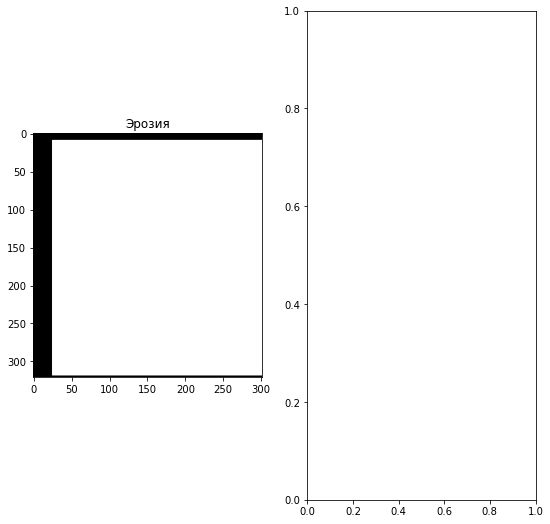

In [35]:
fig, axs = plt.subplots(1,2,figsize=(9,9))
axs[0].imshow(erosion(img, ker_square),cmap='gray')
axs[0].title.set_text('Эрозия')
axs[1].imshow(dilatation(img, ker_square),cmap='gray')
axs[1].title.set_text('Дилатация')